<a href="https://colab.research.google.com/github/Koustav-1250/Bank-Personal--Loan_Model/blob/master/MLProjectBankPersonalLoans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are going to bring the ml model that will pridict the likelyhood of customer taking personal loans
##(Hypothesis Generation)opnion
From some analysis I can say that:

1) person who are educated are more tend towards taking loan.

2)person who have more income are less tend to buy loans than person 

having median and less income.

3)person age also plays important role.

4)No. of family members will can also be the good reason for taking loans.


 The above are my opinion now I am going to process the data and see whether my opinion are ture in facts or the likelihood depends on  the other criterias. 

# ***1.Data Preprocessing>>***

**1.1Importing Libraries>>>**


In [ ]:
import seaborn as sns                 #Ploting graphs 
import matplotlib.pyplot as plt        #for visualizing graph here
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline                 


In [ ]:
from google.colab import files            #uploading data to google collab
uploaded =files.upload()


Saving datasets_48024_87370_Bank_Personal_Loan_Modelling.csv to datasets_48024_87370_Bank_Personal_Loan_Modelling (2).csv


**1.2)Loading data(features)>>**

Personal Loan being a target value






In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['datasets_48024_87370_Bank_Personal_Loan_Modelling.csv']))


In [ ]:
 #Display the top 5 rows of uploaded data 
 
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Displaying the last 5 rows of uploaded data

df.tail() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#Checking DataType

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


AlMost all  datatype are numeric  here.

">>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [ ]:
#Statistical Summarry(Mean,Standard Deviation)

df.describe() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Lot of insights can be taken away from the above table..

for ex: we have see the shapeof our dataset which has 5000 rows and we 

can see here that count for every column is 5000

so there are no null values.

Similarly lot of statistical information is very useful.



^^So here Personal Loan is our label and all other are our features...

In [ ]:
df.shape

(5000, 14)

There are 5000 rows and 14 columnns in our dataset



 **1.3)Checking for unique Values>>**

In [ ]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

^^Ok here we can see  that there are many categorical data like Mortgage,CreditCard,etc.as well which can be important in splitting of dataset we need to take care of that



**1.4)Checking for any null values>>**


In [ ]:
df.isnull().sum()  #No null values


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# ***2)Data Cleaning>>***

Data cleaning is neccessary step where we discard datas given to us ,which have no relation with the target(label) dataset 




a)setting ID as serial No.

b)Checking for any faulty values like in Experiance

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As we have seen that we have min val of -3 in Experience so we will change it to median>>>

In [ ]:
median=df['Experience'].median()
print(median)

20.0


In [ ]:
col=['Experience']                            #Changed all negative values in Experiance column
df[col]=df[col].mask(df[col]<0,median)


^^Here we have seen few unrelevant information given to us which we have taken care about.

**Note:**

Important point is that this is not the last step of data cleaning wherever we will found unrelevant correlation with our target value we will to data cleaning process

# 3)**EDA**

** Now we will do exploratory data analysis by visualization and summarizing main characteristics which effects our target


Also we will be doing(Data cleaning as well)

**3.1)Counting all categorical and numerical values**

In [ ]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

^^ here we can see that there is not much diffrence in count of family members


In [ ]:
(df.Mortgage==0).sum()   

3462

^^This shows the no. of people have no home loans which is quite high

In [ ]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

^^ **Insights**:Most of them is UnderGrad and they seldomly need loans

In [ ]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

**^Take away:**
a)Almost 4500 people doesn't have credit card account

b)Almost 4500 people doesn't have  Securities account

c)Almost 3500 people have 0 mortgage 

**3.2)Univariate Analysis>>>**

Looking more deeply to the dataset by doing univariate analysis

Seeing the distribution of all  numerical features

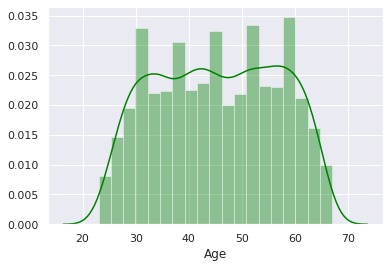

In [ ]:
sns.distplot(df.Age,color="green")


Checking relation between education and Personal loan

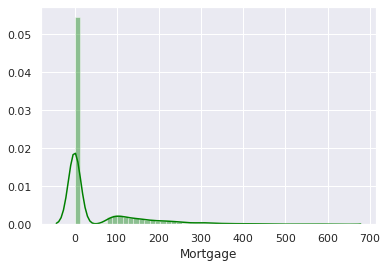

In [ ]:
sns.distplot(df.Mortgage,color="green")

^^can be seen clearly the graph is rightly skewed



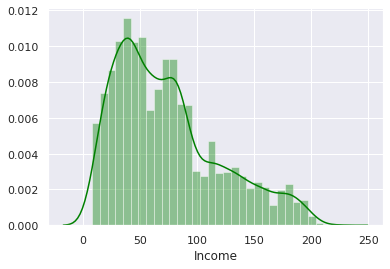

In [ ]:
sns.distplot(df.Income,color="green")

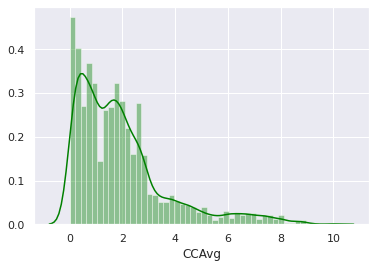

In [ ]:
sns.distplot(df.CCAvg,color="green")

In [ ]:
df.skew(axis=0,skipna=None)    #Needed for Normalazation

ID                     0.000000
Age                   -0.029341
Experience            -0.014100
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

**^Many features like Mortgage ,CD account are skewed so we need to normalize the dataSet**


**3.3)Bivariate Analysis**


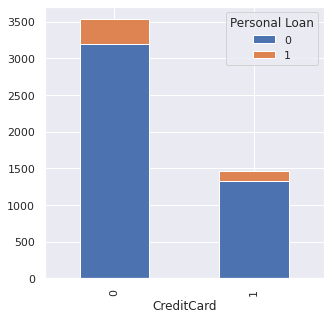

In [ ]:
edu=pd.crosstab(df['CreditCard'],df['Personal Loan'])
edu.plot.bar(figsize=(5,5),stacked=True)

^People having no credit card tend to buy personal loans..

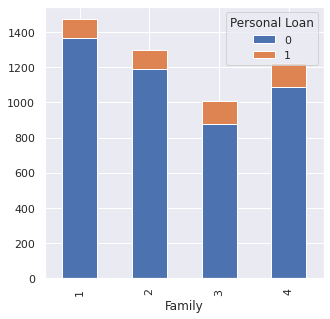

In [ ]:
edu=pd.crosstab(df['Family'],df['Personal Loan'])
edu.plot.bar(figsize=(5,5),stacked=True)

^^No. of family members doesn't effect personal much so our hypothesis was wrong.

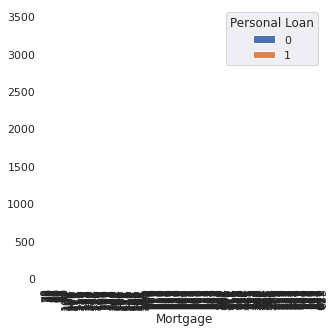

In [ ]:
edu=pd.crosstab(df['Mortgage'],df['Personal Loan'])
edu.plot.bar(figsize=(5,5),stacked=True)

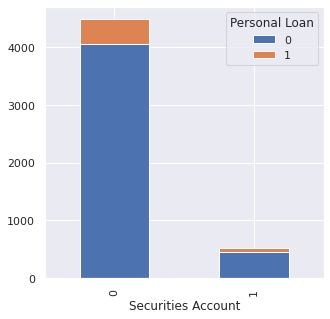

In [ ]:
edu=pd.crosstab(df['Securities Account'],df['Personal Loan'])
edu.plot.bar(figsize=(5,5),stacked=True)

^People having no Securities Account tend to buy personal loans..

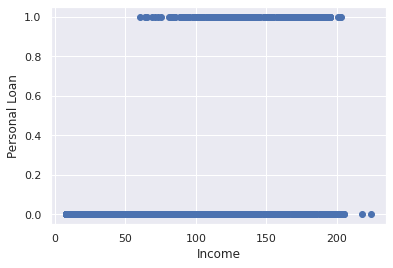

In [ ]:
plt.xlabel("Income")
plt.ylabel("Personal Loan")
plt.scatter(df.Income,df['Personal Loan'])

^^Personal with less income tend to buy more Loans

**Correlation between all numeric datatype in data frame**





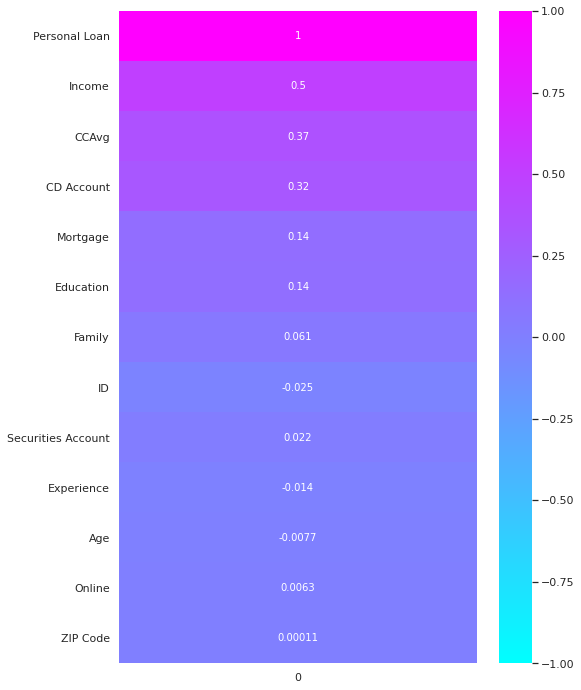

In [ ]:
correlations = df.corrwith(df['Personal Loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]          
fig, ax = plt.subplots(figsize=(8,12))
sns.heatmap(sorted_correlations.to_frame(), cmap='cool', annot=True, vmin=-1, vmax=1, ax=ax);

As we can see ZIP code  is least correlated so it doesn't contribute to our target much


In [ ]:
#df.drop(['ZIP Code'],axis=1,inplace=True)

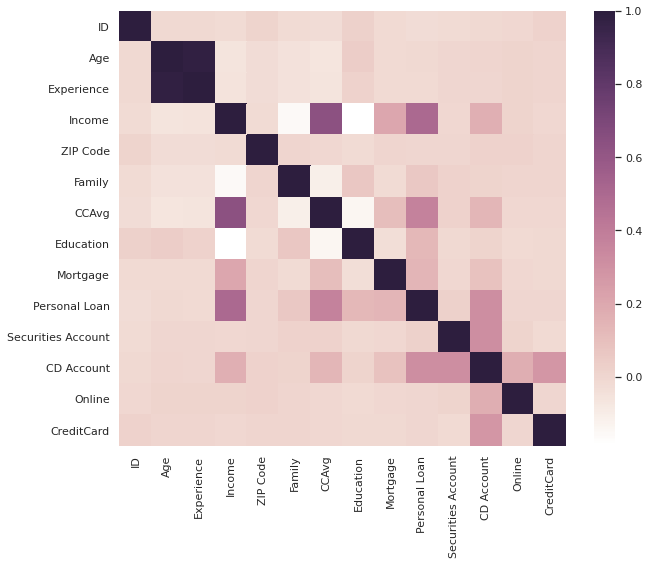

In [ ]:
df['CCAvg']=df['CCAvg'].astype('int64')
corr = df.loc[:,df.dtypes == 'int64'].corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.cubehelix_palette(light=1, as_cmap=True));

**^Strongly correlated Features  with Personal Loan are**:

1)CD Account

2)Income

3)CC Avg

4)Mortgage 


# **4)Applying Necessary Transformation in our features**

Now as we know that outliers skewness can effect our data seriously so

we need to remove them>>>

As we have come across our skewness of strongly correlated features 
so we will do *outlier treatment* and also try to remove skewness.

Removing outliers and skeweness by Power Transformation 
We can also use z-score to do the Same



Outliers present in Income


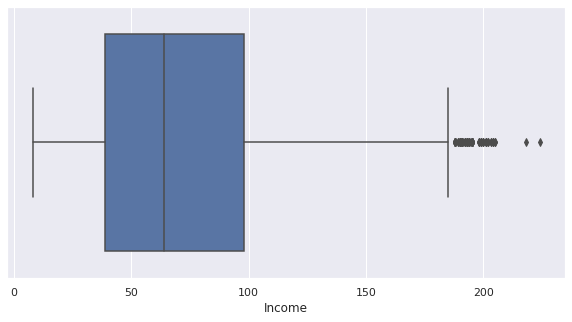

In [ ]:
import seaborn as sns       
plt.figure(figsize=(10,5))                 #we can see the outliers in the below plot which are not present in box
sns.boxplot(x=df['Income'])     
print("Outliers present in Income")            

Outliers present in CCAvg


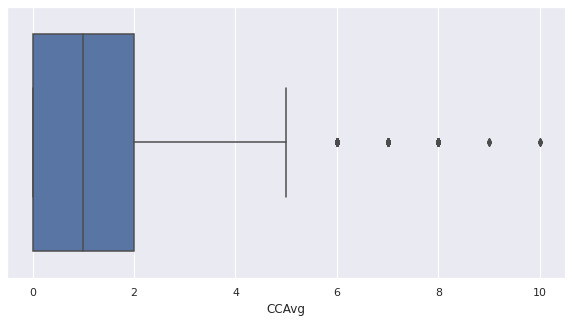

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['CCAvg']) #Outliers exists
print("Outliers present in CCAvg")

^^ In above steps we have remove outliers from our strongly correlated features.

*** Removing skewness by Power Transformation***

In [ ]:
df1=df.copy()                               #making a copy of our dataframe
X=df1.loc[:,df.columns!='Personal Loan']    #Excluding personal Loan target column
Y=df1[['Personal Loan']]

***Used boxcox transformation for strictly positive values and yeo johnson for both negative and positive values...***

In [ ]:
from scipy import stats
Inc_=stats.boxcox(df['Income'])[0]
#Checking the skewness after applying transformation
pd.Series(Inc_).skew()

-0.04074421862526263

^^ We have bring our income data more normalized ;
previous skewness(0.84) to -0.03

Income After Applying Boxcox Transformation


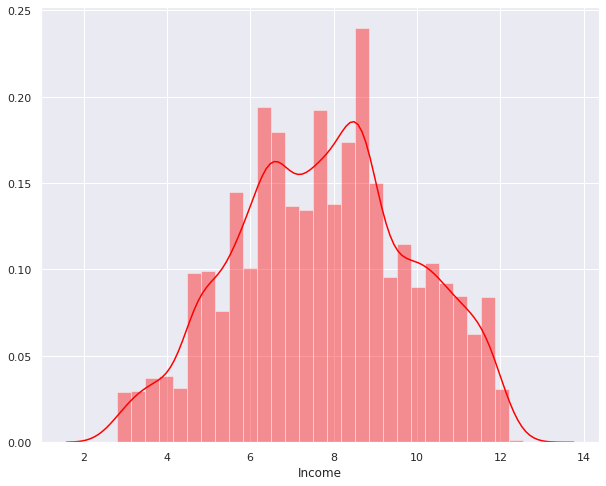

In [ ]:
df.Income=Inc_
sns.distplot(df.Income,color="red")
print("Income After Applying Boxcox Transformation")  

In [ ]:
#Applying yeo johnson model for CCAvg
ccavg=stats.yeojohnson(df['CCAvg'])[0]
#Seeing my skewness after applying yeo-johnson
pd.Series(ccavg).skew()

0.0685220295140723

^^ We have bring our CCAvg data more normalized ;
previous skewness(1.59) to -0.086
*(Great)*

CCAvg After Applying yeo-Johnson transformation


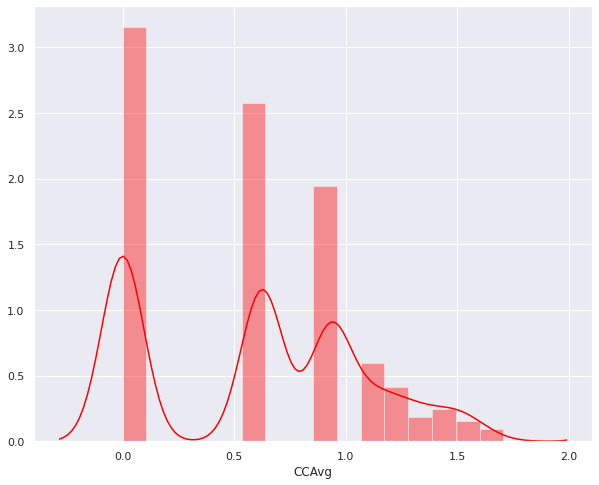

In [ ]:
df.CCAvg=ccavg
sns.distplot(df.CCAvg,color='red')
print("CCAvg After Applying yeo-Johnson transformation")  

**As we can se that mortgage has distinct values so we will use bins to normalize it>>>**

In [ ]:
X['Mortgage_bin']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop('Mortgage',axis=1,inplace=False)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_bin
0,1,25,1,49,91107,4,1,1,1,0,0,0,0
1,2,45,19,34,90089,3,1,1,1,0,0,0,0
2,3,39,15,11,94720,1,1,1,0,0,0,0,0
3,4,35,9,100,94112,1,2,2,0,0,0,0,0
4,5,35,8,45,91330,4,1,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1,3,0,0,1,0,0
4996,4997,30,4,15,92037,4,0,1,0,0,1,0,0
4997,4998,63,39,24,93023,2,0,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0,2,0,0,1,0,0


Mortgage After Applying Binning


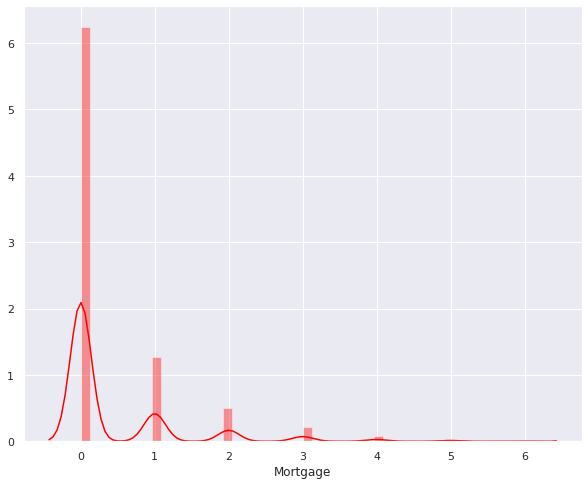

In [ ]:
df.Mortgage=X.Mortgage_bin            #Our transform Mortgage
sns.distplot(df.Mortgage,color='red')
print("Mortgage After Applying Binning")   

In [ ]:
df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,7.781652,93152.503000,2.396400,0.602928,1.881000,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,2.110301,2121.852197,1.147663,0.490449,0.839869,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,2.810951,9307.000000,1.000000,-0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,6.345214,91911.000000,1.000000,-0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,7.808065,93437.000000,2.000000,0.625609,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,9.237217,94608.000000,3.000000,0.935420,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,12.540003,96651.000000,4.000000,1.707932,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000


So after removing outliers and normalize our features it's time to 
our Data Spliting >>>

# 5)Spliting of Training and Test Data Set

Before spliting we need to keep in mind that the data we distribute in train and test dataset has to evenly distributed which is done by Stratified Sampling of our data..

The main part is to choose random_state as well becuse whenever we call split function we get diffrent values so it is important to set a random_state to get fixed values.

**5.1)Stratified Sampling**

First split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.3,random_state=10)


Doing Stratified Sampling>>>>>

Splitting our key features in way so that we get even distribution                         

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit                #using inbuilt StratifiedShuffleSplit for stratified sampling
split=StratifiedShuffleSplit(n_splits=10,test_size=0.3,random_state=10)
for train_index,test_index in split.split(df,df['CD Account']):            # Applying for CD account
  strat_train_set=df.iloc[train_index]                                  
  strat_test_set=df.iloc[test_index]


In [ ]:
for train_index,test_index in split.split(df,df['CreditCard']):           # Applying for CreditCard
  strat_train_set=df.iloc[train_index]
  strat_test_set=df.iloc[test_index]

In [ ]:
for train_index,test_index in split.split(df,df['Securities Account']):   #Applying for Securitues Account
  strat_train_set=df.iloc[train_index]
  strat_test_set=df.iloc[test_index]

In [ ]:
for train_index,test_index in split.split(df,df['Mortgage']):             #Applying for Mortgage
  strat_train_set=df.iloc[train_index]
  strat_test_set=df.iloc[test_index]

In [ ]:
strat_train_set.describe()            #Our Stratified train_set data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.00000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2508.017143,45.27000,20.225714,7.786572,93131.108000,2.400857,0.603771,1.890000,0.095714,0.104286,0.059429,0.594857,0.296857
std,1447.997000,11.43804,11.268828,2.115824,2266.321703,1.149648,0.490752,0.844032,0.294241,0.305675,0.236459,0.490990,0.456938
min,1.000000,23.00000,0.000000,2.810951,9307.000000,1.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1257.750000,35.00000,10.000000,6.345214,91775.000000,1.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2523.000000,45.00000,20.000000,7.808065,93407.000000,2.000000,0.625609,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3772.250000,55.00000,30.000000,9.237217,94609.000000,3.000000,0.935420,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4999.000000,67.00000,43.000000,12.540003,96651.000000,4.000000,1.707932,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
strat_train_set['Personal Loan'].value_counts()

0    3165
1     335
Name: Personal Loan, dtype: int64

In [ ]:
strat_test_set.describe()               #Our Stratified test_set data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2482.960000,45.498000,20.565333,7.770172,93202.424667,2.386000,0.600959,1.860000,0.096667,0.104667,0.062667,0.601333,0.287333
std,1433.346802,11.523824,11.216250,2.098018,1738.361298,1.143332,0.489900,0.829975,0.295602,0.306226,0.242443,0.489787,0.452669
min,2.000000,23.000000,0.000000,2.810951,90005.000000,1.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1233.750000,36.000000,11.000000,6.345214,92028.750000,1.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.500000,46.000000,20.000000,7.783234,93555.000000,2.000000,0.625609,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3713.250000,56.000000,30.000000,9.344882,94596.000000,3.000000,0.935420,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,12.148657,96651.000000,4.000000,1.607431,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
strat_test_set['Personal Loan'].value_counts()

0    1355
1     145
Name: Personal Loan, dtype: int64

*Here we can see that the ratio of zeros and ones in train and test data is same.*


Here we will do the split our features and labels(target) in train_set
as well as test_set>>>>

In [ ]:
X_features=strat_train_set.drop("Personal Loan",axis=1)   #Personal loan was our label so we drop it from our train_set to fet only features....
X_features=X_features.drop("ID",axis=1)                    
Y_labels=strat_train_set["Personal Loan"].copy()

Making features and labels split in test_set>>>

In [ ]:
X_test_features=strat_test_set.drop("Personal Loan",axis=1)
X_test_features=X_test_features.drop("ID",axis=1)
Y_test_labels=strat_test_set["Personal Loan"].copy()

^^ In this step we have perform all the necessary steps required.
Now we will use diffrent models and see which gives best result>>>

#Feature Scaling

Doing Feautre Sacling to get all our feautres to get our all feautres in same range>>>>

In [ ]:
from sklearn import preprocessing               #Applying StandardScalar technique for feature Scaling
scalar=preprocessing.StandardScaler()
scaled_X_train=scalar.fit_transform(X_features)

scaled_X_test=scalar.fit_transform(X_test_features)

# 6)Data Modelling

Now come the very Important Step to select the model for our dataset

**1)Selecting Logistic Model>>>**

In [ ]:
from sklearn.metrics import accuracy_score                  #Imported all required Libraries
from sklearn.linear_model import LogisticRegression   
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.model_selection import cross_val_score       #Performing cross-Validation
logModel=LogisticRegression()
 #fiting our scaled train data and labels
logModel.fit(scaled_X_train,Y_labels)                   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
 #Applying cross Validation
score_tr=cross_val_score(logModel,scaled_X_train,Y_labels,cv=5)     

In [ ]:
#Accuracy of training dataset
print("Accuracy after Cross Validation of train data Set:")     
score_tr.mean()                     

Accuracy after Cross Validation of train data Set:


0.9542857142857143

In [ ]:
recal1=cross_val_score(logModel,scaled_X_train,Y_labels,scoring="recall",cv=5)  
print("Recall value after Cross Validation of train data Set:") 
recal1.mean()

Recall value after Cross Validation of train data Set:


0.6537313432835821

In [ ]:
score_te=cross_val_score(logModel,scaled_X_test,Y_test_labels,cv=5)    
print("Accuracy after Cross Validation of test data Set:")     
score_te.mean()  

Accuracy after Cross Validation of test data Set:


0.9553333333333335

In [ ]:
predictions=logModel.predict(scaled_X_test)             #Without CrossValidation

In [ ]:

clf_report=classification_report(Y_test_labels,predictions,output_dict=True)      #Report

print("Confusion Matrix:")

print(confusion_matrix(Y_test_labels,predictions))

Confusion Matrix:
[[1344   11]
 [  54   91]]


All important values recall , f1-score, presion :



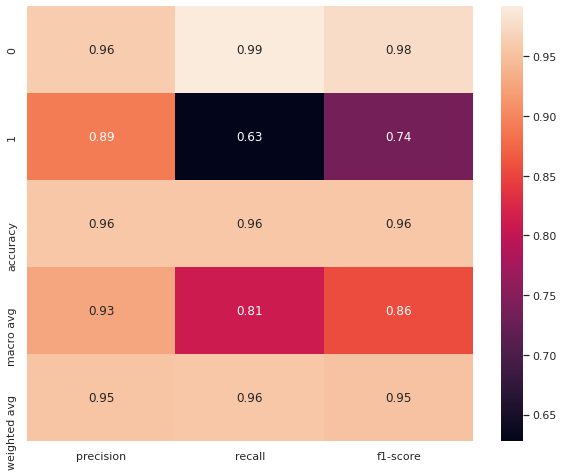

In [ ]:
print("All important values recall , f1-score, presion :")
print()
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

^^With or without crossVAlidation in logistic regression the accuracy and recall value is same


**Getting Area Under ROC curve**

In [ ]:
#Using prdict_proba for calculating probability of 0 0r 1
log=logModel.predict_proba(scaled_X_test)
#calculating probability of 1
fpr1,tpr1,thresold1=roc_curve(Y_test_labels,log[:,1])
#Using auc function to get Area Under Curve
roc_area=auc(fpr1,tpr1)
print("Area Under Curve for Logistic Regression is:" ,roc_area)

Area Under Curve for Logistic Regression is: 0.9742206387581117


***In logistic regression our Recall value for true postives is 66%
 and acuraccy is 95% of both test and training      dataset and our area ROC curve is 97%***




# 7)Now we will look diffrent model as well

# **7.1)Selecting Decsion TreeClassifier**

Decison Tree Classifier uses a tree type Structure where internal node represent test on an attribute and leaf as label on an attribute

In [ ]:
 #Importing decision TreeClassifier
from sklearn.tree import DecisionTreeClassifier                          
dec_tree=DecisionTreeClassifier(criterion='entropy',random_state=42)
dec_tree.fit(scaled_X_train,Y_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
#predicting values for our trained data set
pre=dec_tree.predict(scaled_X_train)   

In [ ]:
print("Accuracy of train data set:")
accuracy_score(Y_labels,pre)                  #Accuracy of training dataset

Accuracy of train data set:


1.0



(What! 1 which is seldomly possible)
***Basically a case of overfitting ***

*>>Our  training data has learn noise too...*
*So we will do cross Validation*



# Cross-Validation

Cross- Validation is an important step beacuse many model like decison tree tend to overfit because they learn noise.Cross-Validation takes one data and train for othes data thus by doing this it just make the more accurate. 

In [ ]:
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
score1_tr=cross_val_score(dec_tree,scaled_X_train,Y_labels,cv=5)

In [ ]:
print("After Applying Cross_Validation in traing dataset:")        #After Cross Validation
                                                            #Accuracy in training dataset
score1_tr.mean()                                   

After Applying Cross_Validation in traing dataset:


0.9800000000000001

In [ ]:
score1_te=cross_val_score(dec_tree,scaled_X_test,Y_test_labels,cv=5)
print("Accuracy in test dataset :",score1_te.mean())

Accuracy in test dataset : 0.9733333333333333


In [ ]:
recal2=cross_val_score(dec_tree,scaled_X_test,Y_test_labels,scoring="recall",cv=5) 
print("Recall value of our test-dataset:",recal2.mean())     #Recall vlaue for Decision tree Classifier

Recall value of our test-dataset: 0.8965517241379309


Decision Tree:



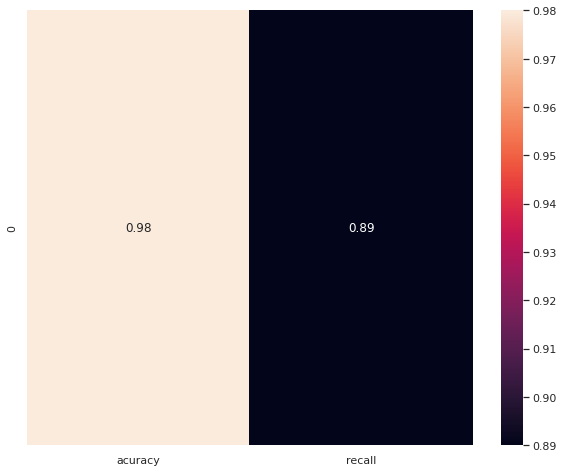

In [ ]:
clf_report1={'0':{'acuracy':0.98,'recall':0.89}}
print("Decision Tree:")
print()
sns.heatmap(pd.DataFrame(clf_report1).iloc[:,0 :].T, annot=True)

In [ ]:
pre=dec_tree.predict(scaled_X_test)

print(classification_report(Y_test_labels,pre))
print("Confusion Matrix:")

print(confusion_matrix(Y_test_labels,pre))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1355
           1       0.91      0.92      0.91       145

    accuracy                           0.98      1500
   macro avg       0.95      0.96      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
[[1341   14]
 [  11  134]]


Area under ROC curve

In [ ]:
#for Area 
dt=dec_tree.predict_proba(scaled_X_test)
fpr2,tpr2,thresold2=roc_curve(Y_test_labels,dt[:,1])
roc_area=auc(fpr2,tpr2)
print("Area under ROC cueve Decsion tree:" ,roc_area)

Area under ROC cueve Decsion tree: 0.9569029138567248


***SO in Decsion Tree Classifier acuracy is 96% in training dataset and 97% in test dataset and recall value as 89.6%***

# **7.2)Selecting RandomForest Classifier**

Random forest is an ensemble technique ,It use many tree models for training of data.

In [ ]:
#Applying Ensemble Techniques
from sklearn.ensemble import RandomForestClassifier
rand1=RandomForestClassifier(criterion='entropy',n_estimators=150,random_state=42)
rand1.fit(scaled_X_train,Y_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
predict1=rand1.predict(scaled_X_train)        

In [ ]:
print("Accuracy of train data-Set: ")
accuracy_score(Y_labels,predict1)         #Accuracy of train dataset

Accuracy of train data-Set: 


1.0

**Again a case of overfiting **

In [ ]:
#Doing Cross Validation

score2_tr=cross_val_score(rand1,scaled_X_train,Y_labels,cv=5)      

In [ ]:
print("Acurracy of train data set after cross -validation: ")

print(score2.mean())


Acurracy of train data set after cross -validation: 
0.9842857142857143


In [ ]:
score2_tr=cross_val_score(rand1,scaled_X_train,Y_labels,cv=5)    

In [ ]:
 #Recall Value Random Forest Classifier

recal3=cross_val_score(rand1,scaled_X_train,Y_labels,scoring="recall",cv=5)

print("Recall for randamforest:",recal3.mean() )   

Recall for randamforest: 0.8656716417910447


In [ ]:
score2_te=cross_val_score(rand1,scaled_X_test,Y_test_labels,cv=5)  
print("Acurracy of train data set after cross -validation: ")

print(score2_te.mean())   

Acurracy of train data set after cross -validation: 
0.9793333333333333


Random Forest:



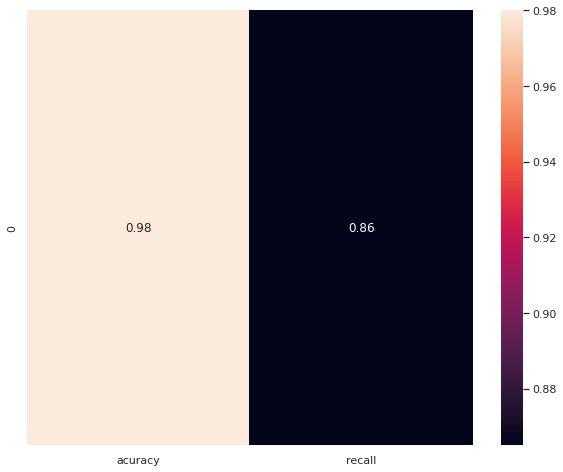

In [ ]:
#With cross validation
clf_report2={'0':{'acuracy':0.98,'recall':0.865}}

print("Random Forest:")
print()
sns.heatmap(pd.DataFrame(clf_report2).iloc[:,0 :].T, annot=True)

In [ ]:
#With out Cross-
pre1=rand1.predict(scaled_X_test)

print(classification_report(Y_test_labels,pre1))
print("Confusion Matrix:")

print(confusion_matrix(Y_test_labels,pre1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1355
           1       0.98      0.92      0.95       145

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

Confusion Matrix:
[[1352    3]
 [  11  134]]


Area Under Roc curve

In [ ]:
ran=rand1.predict_proba(scaled_X_test)

fpr3,tpr3,thresold3=roc_curve(Y_test_labels,ran[:,1])

roc_area=auc(fpr1,tpr1)

print("Area under ROC Curve:" ,roc_area)

Area under ROC Curve: 0.9742206387581117


***So in RandomForestClassifier acuracy is 98% in training dataset and 97% in test dataset and recall value as 87%***

# **7.3)Selecting Support Vector Machine**

SVM is a supervised machine learning algorithm which is mainly used for classification.

In [ ]:
from sklearn import svm
clf=svm.SVC(C=3,kernel='rbf',probability=True)
clf.fit(scaled_X_train,Y_labels)


SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Support Vector Machine
y_pre=clf.predict(scaled_X_test)
print(classification_report(y_pre,Y_test_labels))

print(confusion_matrix(y_pre,Y_test_labels))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1377
           1       0.81      0.95      0.87       123

    accuracy                           0.98      1500
   macro avg       0.90      0.97      0.93      1500
weighted avg       0.98      0.98      0.98      1500

[[1349   28]
 [   6  117]]


Area Under the Curve

In [ ]:
sv=clf.predict_proba(scaled_X_test)

fpr4,tpr4,thresold4=roc_curve(Y_test_labels,sv[:,1])

roc_area1=auc(fpr4,tpr4)

print("Area under ROC Curve:" ,roc_area1)

Area under ROC Curve: 0.9938923527166307


# 8)Comparision of Models

*Plotting graphs for all the applied models >> ROC curve*

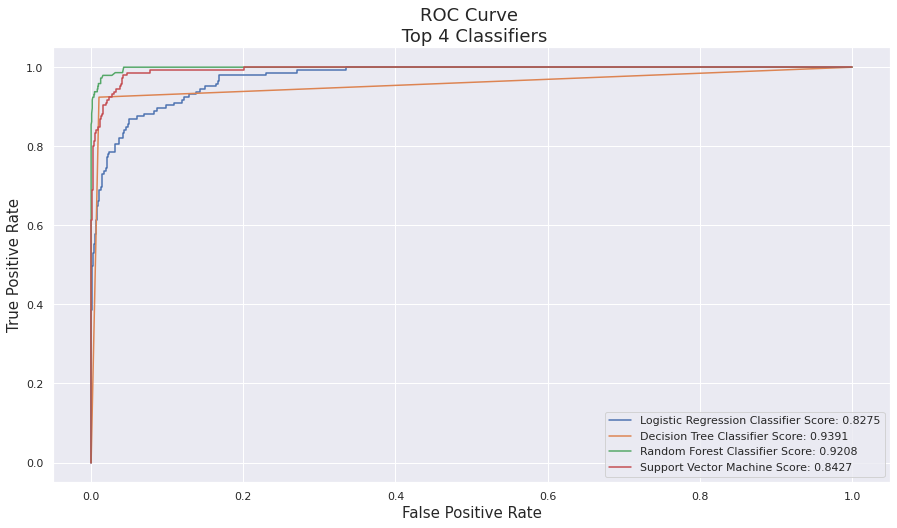

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.plot(fpr1,tpr1,fpr2,tpr2,fpr3,tpr3,fpr4,tpr4)

label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(Y_test_labels, cross_val_predict(logModel,scaled_X_test,Y_test_labels, cv=5)))

label2='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(Y_test_labels, cross_val_predict(dec_tree,scaled_X_test,Y_test_labels,cv=5)))

label3='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(Y_test_labels, cross_val_predict(rand1,scaled_X_test,Y_test_labels,cv=5)))

label4='Support Vector Machine Score: {:.4f}'.format(roc_auc_score(Y_test_labels, cross_val_predict(clf,scaled_X_test,Y_test_labels,cv=5)))
plt.legend((label,label2,label3,label4))



**Plotting Recall Value of models**

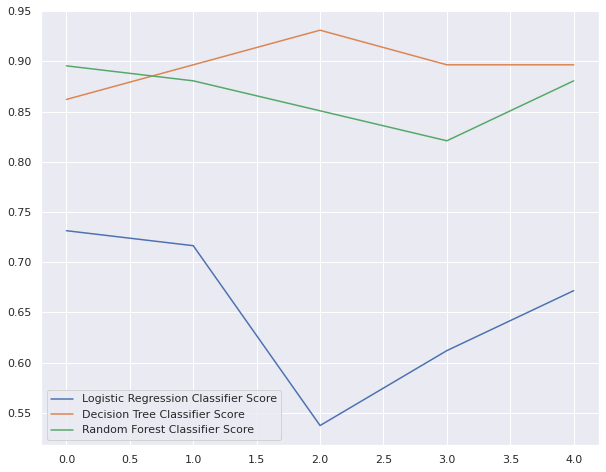

In [ ]:
plt.plot(recal1)
plt.plot(recal2)
plt.plot(recal3)
label='Logistic Regression Classifier Score'
label2='Decision Tree Classifier Score'
label3='Random Forest Classifier Score'
plt.legend((label,label2,label3))

plt.show()

Thus from above Decesion tree Classifier works as best
Also recall value is highest in Decsion Tree.

# 9)Business Understanding Of Model

We have seen that our model has predicted the qutite accuratelty.The

important was to do data preprocessing where lot of irrelevant data 

was removed.Then i have done more depth analysis by pointing out which 

factor was most important to get the accurate results.Like i found the 

data which was more correlated to our target value Like Income,

CreditCard,CCAvg,Securities Account.After that I have removed the 

outliers which was seldomly affecting our data by doing Standardisation.

After that I have split the data into train and test dataset so that i 

can cross verify afer training my train dataset for test dataset with the help

of stratified sampling.

Then at last i have data modeling part which can predict my data more

efficiently.




Diffrent Model Prediction:



---


1)Logistic Regression: 

>>)Accuracy on trian dataset:96% 


>>b)Accuracy on test dataset:95.4%


>>c)Recall value:67%

>>d)Area Under Curve:97%

>>>Since recall value is not that high inspite of high Area we will not deploy 

this model.

---
2)Decision Tree Classifier: 

>>)Accuracy on trian dataset:98% 


>>b)Accuracy on test dataset:97%


>>c)Recall value:89%

>>d)Area Under Curve:96%

>>>This model is good and also recall value is also high so we can deploy this model


---

3)RandomForest Classifier: 

>>)Accuracy on trian dataset:98% 


>>b)Accuracy on test dataset:97%


>>c)Recall value:86%

>>d)Area Under Curve:97%

>>>This model is good and also recall value is also high but less than our Decision Tree


---




# *After trying out diffrent models I found that recall values which* 

# *predict my true positive values and acuracy and area under roc curve* 

# *was  best in my Dcesion Tree Model.* 

# *So I decided that I will deploy Decision Tree Model. Now the company can use 

# the model for profit by clearly knowing whcih customers they should target.*

